# Computational Intelligence

## Data Preprocessing

### Data Loading and Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# reading the csv file using pandas 

data = pd.read_csv('garments_worker_productivity.csv')


In [2]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [4]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [5]:
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [6]:
# checking for missing values
data.wip.isnull().sum()

506

In [7]:
# checking for duplicates
data.duplicated().sum()

0

### Data Cleaning

In [8]:
# removing the missing data from wip 

dropped_data = data.drop(labels=["wip"], axis=1, inplace=False)

In [9]:
dropped_data

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1800,0,0.0,0,0,15.0,0.505889


In [10]:
dropped_data.quarter.unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [11]:
dropped_data.department.unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [12]:
dropped_data.day.unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

### Handling Datetime Column

In [13]:
df = pd.to_datetime(dropped_data["date"])

In [14]:
dropped_data["year"] = df.dt.year

In [15]:
dropped_data["month"] = df.dt.month

In [16]:
dropped_data["day"] = df.dt.day

In [17]:
dropped_data["weekday"] = df.dt.weekday

In [18]:
dropped_data.drop(labels=["date"], axis=1, inplace=True)

In [19]:
dropped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   int32  
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   over_time              1197 non-null   int64  
 7   incentive              1197 non-null   int64  
 8   idle_time              1197 non-null   float64
 9   idle_men               1197 non-null   int64  
 10  no_of_style_change     1197 non-null   int64  
 11  no_of_workers          1197 non-null   float64
 12  actual_productivity    1197 non-null   float64
 13  year                   1197 non-null   int32  
 14  month                  1197 non-null   int32  
 15  week

In [20]:
dropped_data.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,year,month,weekday
0,Quarter1,sweing,1,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,2015,1,3
1,Quarter1,finishing,1,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,2015,1,3
2,Quarter1,sweing,1,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,2015,1,3
3,Quarter1,sweing,1,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,2015,1,3
4,Quarter1,sweing,1,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,2015,1,3


### Sorting the Wrong Spelling Issue.

In [21]:
dropped_data['department'] = dropped_data['department'].replace('sweing', 'sewing')
dropped_data['department'] = dropped_data['department'].replace('finishing ', 'finishing')

In [22]:
dropped_data.department.unique()

array(['sewing', 'finishing'], dtype=object)

### Transforming Actual Productivity to two classes

In [23]:
dropped_data['actual_productivity_class'] = np.where(dropped_data['actual_productivity'] >= 0.80, 'Satifactory', 'Non-Satisfactory')


In [24]:
dropped_data.department.value_counts()

department
sewing       691
finishing    506
Name: count, dtype: int64

In [25]:
dropped_data.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,year,month,weekday,actual_productivity_class
0,Quarter1,sewing,1,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,2015,1,3,Satifactory
1,Quarter1,finishing,1,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,2015,1,3,Satifactory
2,Quarter1,sewing,1,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,2015,1,3,Satifactory
3,Quarter1,sewing,1,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,2015,1,3,Satifactory
4,Quarter1,sewing,1,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,2015,1,3,Satifactory


## Data Visualization

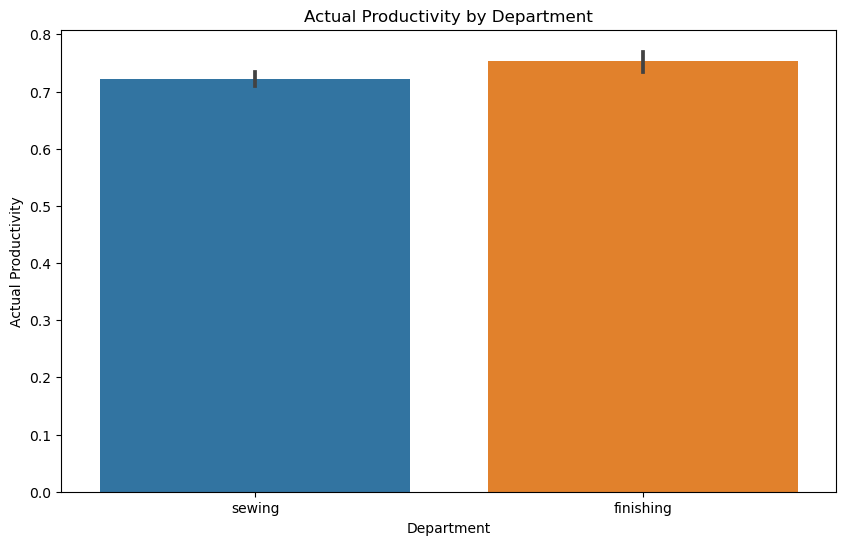

In [26]:
# Plotting a bar chart of the actual productivity by department
plt.figure(figsize=(10, 6))
sns.barplot(x='department', y='actual_productivity', data=dropped_data)
plt.title('Actual Productivity by Department')
plt.xlabel('Department')
plt.ylabel('Actual Productivity')
plt.show()


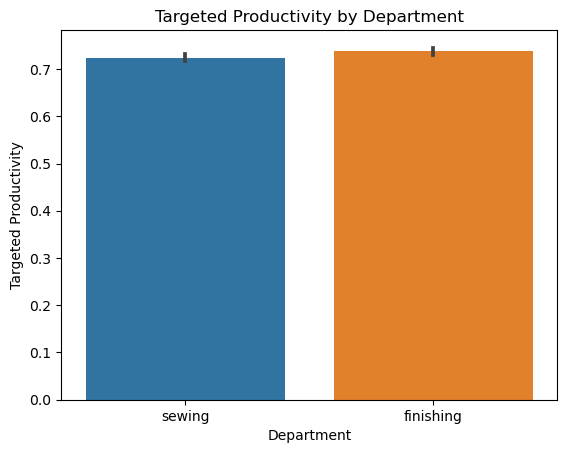

In [27]:
sns.barplot(x='department', y='targeted_productivity', data=dropped_data)
plt.title('Targeted Productivity by Department')
plt.xlabel('Department')
plt.ylabel('Targeted Productivity')
plt.show()


### Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import SGD

2024-04-16 13:43:45.017826: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 13:43:45.018451: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 13:43:45.154979: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-16 13:43:56.827583: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [29]:
encoder = LabelEncoder()

In [30]:
# checking for categorical columns
obj_col = list(dropped_data.select_dtypes(include='object').columns)

In [31]:
obj_col

['quarter', 'department', 'actual_productivity_class']

In [32]:
dropped_data[obj_col] = dropped_data[obj_col].apply(encoder.fit_transform)

In [33]:
dropped_data.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,year,month,weekday,actual_productivity_class
0,0,1,1,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,2015,1,3,1
1,0,0,1,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,2015,1,3,1
2,0,1,1,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,2015,1,3,1
3,0,1,1,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,2015,1,3,1
4,0,1,1,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,2015,1,3,1


In [34]:
dropped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   quarter                    1197 non-null   int64  
 1   department                 1197 non-null   int64  
 2   day                        1197 non-null   int32  
 3   team                       1197 non-null   int64  
 4   targeted_productivity      1197 non-null   float64
 5   smv                        1197 non-null   float64
 6   over_time                  1197 non-null   int64  
 7   incentive                  1197 non-null   int64  
 8   idle_time                  1197 non-null   float64
 9   idle_men                   1197 non-null   int64  
 10  no_of_style_change         1197 non-null   int64  
 11  no_of_workers              1197 non-null   float64
 12  actual_productivity        1197 non-null   float64
 13  year                       1197 non-null   int32

In [35]:
norm = Normalizer()

In [36]:
X =  dropped_data.drop(['actual_productivity_class'], axis=1)
y = dropped_data["actual_productivity_class"]

In [37]:
X = norm.fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

#### Model Building with Scratch ANN

In [39]:
from model_new import NeuralNetwork

In [40]:
training_data = [(x.reshape(-1, 1), y) for x, y in zip(X_train, y_train)]
test_data = [(x.reshape(-1, 1), y) for x, y in zip(X_test, y_test)]

In [41]:
n_inputs = 16
n_outputs = 2
n_neurons = 20


In [42]:
network = NeuralNetwork([16, 20, 1])
train_data = training_data

In [43]:
network.SGD(train_data, 30, 10, 3.0)

Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 957
Epoch 0: 0 / 9

In [ ]:
network.evaluate(test_data)

In [ ]:
y_pred = network.predict(X_test[0].reshape(-1, 1))

#### ANN with 10 neurons

In [ ]:
n_inputs = 16
n_outputs = 2
n_neuron_10 = 10

In [ ]:
network = NeuralNetwork([n_inputs, n_neuron_10, n_outputs])

#### Model Building with Keras Model

In [ ]:
model_keras = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
model_keras.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


In [ ]:
# Evaluate the model
loss, accuracy = model_keras.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


##### Model tuning

In [ ]:
from keras.layers import Dropout, BatchNormalization
from keras import regularizers

In [ ]:
model_tune = Sequential()
model_tune.add(Dense(units=20, activation='relu', input_dim=X_train.shape[1]))
model_tune.add(Dropout(0.5))
model_tune.add(Dense(64, input_dim=64,
                kernel_regularizer=regularizers.l1(0.01),
                activity_regularizer=regularizers.l2(0.01)))
model_tune.add(BatchNormalization())
model_tune.add(Dense(units=1, activation='softmax'))

In [ ]:
model_tune.compile(optimizer=SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_tune.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

#### Model Building with RandomForest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf.fit(X_train, y_train)


In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
f1_score(y_test, y_pred)

In [ ]:
accuracy_score(y_test, y_pred)